## Made with TF 2.0


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [ ]:
#%tensorflow_version 1.x

In [1]:
import pandas as pd

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/fake_reg.csv

--2021-11-15 15:28:50--  https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/fake_reg.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.148.50
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.148.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55914 (55K) [text/csv]
Saving to: ‘fake_reg.csv’

fake_reg.csv        100%[===================>]  54.60K   222KB/s    in 0.2s    

2021-11-15 15:28:52 (222 KB/s) - ‘fake_reg.csv’ saved [55914/55914]



In [3]:
df = pd.read_csv('fake_reg.csv')

In [4]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### Explore the data

Diamo un occhio a come sono distribuiti gli observation tra le features e la target(price)

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

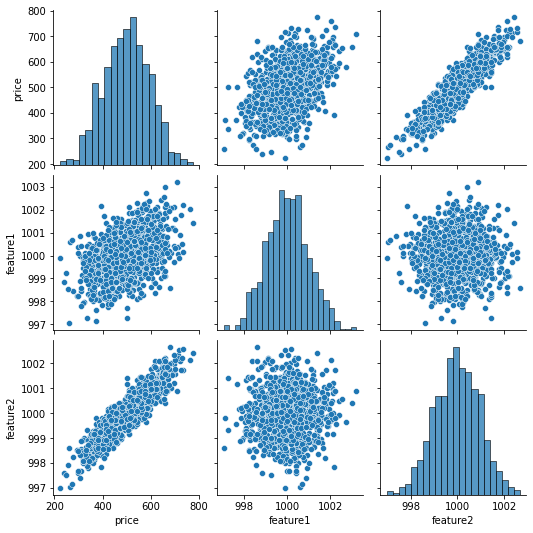

In [7]:
sns.pairplot(df);

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Convert Pandas to Numpy for Keras
# Features
X = df[['feature1','feature2']].values

# Target
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
y_train.shape

(700,)

In [13]:
y_test.shape

(300,)

## ML classic problem

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model = model.fit(X_train,y_train)

In [17]:
model.intercept_

-127996.09402376022

In [18]:
model.coef_

array([40.05241913, 88.44347527])

In [19]:
y_pred = model.predict(X_test)
y_pred

array([449.54731242, 350.13426599, 503.44344541, 640.20035819,
       508.60922283, 425.87510453, 481.78977753, 409.58978812,
       542.09401314, 528.05833606, 321.85779475, 459.95745013,
       411.7361376 , 579.24731239, 359.84303412, 402.63006552,
       657.32449724, 618.64288618, 454.28368347, 462.59508937,
       326.08322973, 466.49668598, 474.27934369, 640.86263231,
       732.96483057, 449.50899947, 615.16456875, 466.22407861,
       627.15081647, 511.75040285, 698.46880844, 464.11728585,
       490.73377174, 489.75072166, 400.37537785, 432.31552244,
       471.61615572, 459.30776965, 341.28429936, 473.47042087,
       409.0031019 , 573.7908117 , 449.41149122, 566.47068212,
       573.57250376, 597.42942455, 659.22373175, 645.36826026,
       519.65454145, 570.71373135, 614.13919107, 598.35559592,
       522.80135663, 528.85532025, 543.41029515, 512.61975405,
       446.44182563, 556.3062501 , 579.40089266, 524.44869925,
       322.26015212, 472.39838844, 381.24989059, 486.53

In [20]:
confronto = pd.DataFrame(np.column_stack((y_test,y_pred)),
                         columns = ['predetti', 'reali_test'])
confronto

,predetti,reali_test
0,446.612510,449.547312
1,349.717994,350.134266
2,508.911765,503.443445
3,635.347066,640.200358
4,505.692709,508.609223
...,...,...
295,553.879996,549.531876
296,610.455352,598.954410
297,565.936200,556.621700
298,493.012018,502.919643


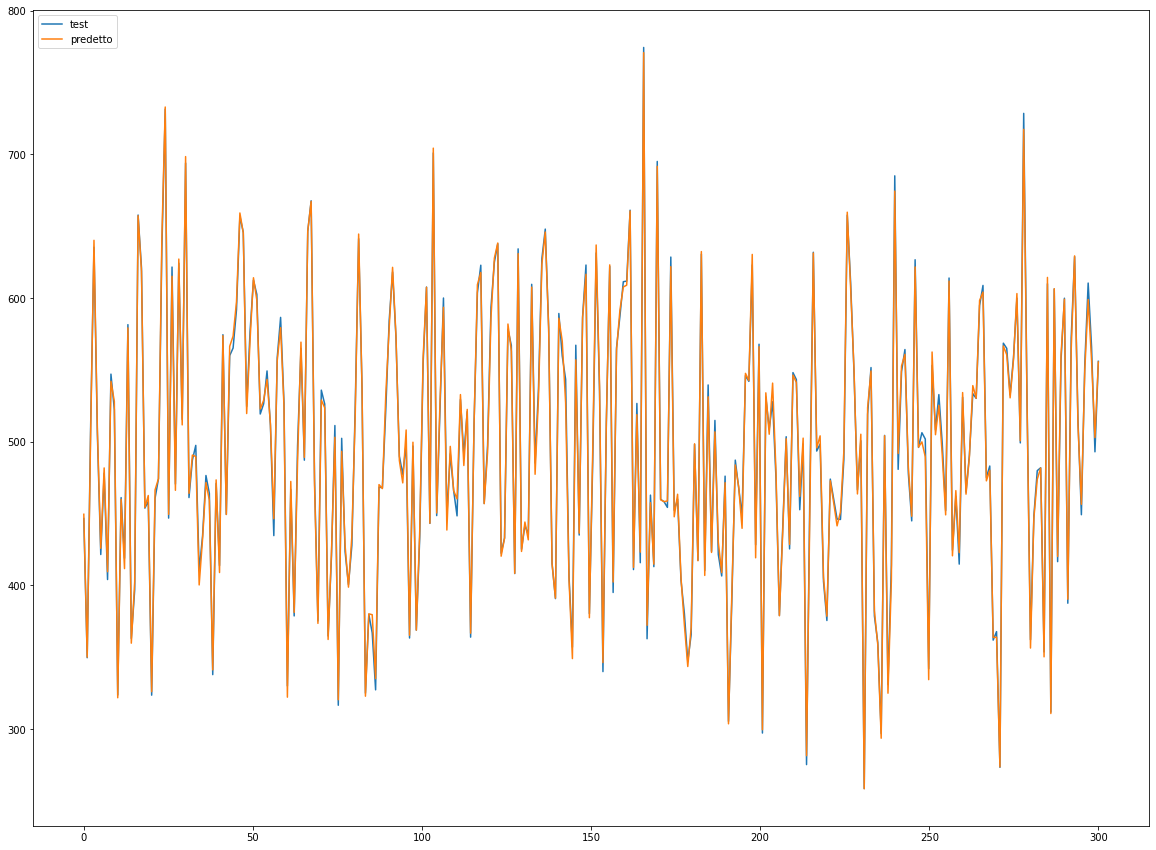

In [21]:
_ = y_pred.shape[0] # 30 
x = np.linspace(0,_,_)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.9971374826155941
mae:  4.066973142948772
mse:  25.73216936967932


In [28]:
model.predict([[45,453]])[0]

-86128.84086418158

## Preparing Data for Neural Network

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, 
#                                                     test_size=0.3,
#                                                     random_state=667
#                                                     )

In [79]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [80]:
X_test

array([[ 6.43458355e-01, -9.08549058e-01],
       [-1.96325927e+00, -8.81011034e-01],
       [-5.69933540e-01,  3.11737558e-01],
       [ 9.48842085e-01,  1.24596972e+00],
       [-1.71264996e-01,  1.86523711e-01],
       [-2.33531166e+00,  2.06934358e-01],
       [-9.20852280e-01,  2.15751043e-01],
       [-1.01028693e+00, -6.12489131e-01],
       [ 7.49662762e-01,  1.57064045e-01],
       [-6.10418246e-01,  6.27484218e-01],
       [-1.05311985e+00, -1.64986750e+00],
       [ 1.65080237e+00, -1.25678962e+00],
       [-3.71572430e-01, -8.86985736e-01],
       [-4.93458345e-01,  1.18951332e+00],
       [-1.15659614e+00, -1.14333156e+00],
       [-1.18418833e+00, -6.14600893e-01],
       [ 2.15984106e+00,  8.82886778e-01],
       [ 9.74656387e-01,  9.73976249e-01],
       [-5.81812561e-01, -2.75247852e-01],
       [-1.12805462e+00,  8.18194582e-02],
       [-3.47824353e-01, -1.93061390e+00],
       [-9.97478967e-01,  6.74434032e-02],
       [-4.42930484e-01, -9.95323348e-02],
       [ 1.

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
#help(Sequential)

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

Sequential groups a linear stack of layers into a tf.keras.Model.

Sequential provides training and inference features on this model.

https://keras.io/api/layers/core_layers/dense/

In [36]:
# tensorflow.keras.layers.Dense(
#     units,
#     activation=None,
#     use_bias=True,
#     kernel_initializer="glorot_uniform",
#     bias_initializer="zeros",
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     **kwargs
# )

### Model - as a list of layers

In [37]:
# model = Sequential([
#     Dense(units=2),
#     Dense(units=2),
#     Dense(units=2)
# ])

### Model - adding in layers one by one

In [38]:
model = Sequential()

model.add(Dense(units=2))
model.add(Dense(units=2))
model.add(Dense(units=2))

Let's go ahead and build a simple model and then compile it by defining our solver

In [39]:
X_train.shape[1]==2 #how many features?

True

In [40]:
model = Sequential()

model.add(Dense(4,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

### RMSPROP
RMSPROP algorithm that’s used for full-batch optimization. RMSPROP tries to resolve the problem that gradients may vary widely in magnitudes. Some gradients may be tiny and others may be huge, which result in very difficult problem — trying to find a single global learning rate for the algorithm. If we use full-batch learning we can cope with this problem by only using the sign of the gradient. With that, we can guarantee that all weight updates are of the same size. This adjustment helps a great deal with saddle points and plateaus as we take big enough steps even with tiny gradients.

https://keras.io/api/optimizers/

In [41]:
#model.compile(optimizer='SGD',loss='mse',metrics=['MeanSquaredError']) # Stochastic Gradient Descent

In [42]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['MeanSquaredError']) # Accuracy only for classification

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a REGRESSION problem:
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['MeanSquaredError'])

    # For a BINARY CLASSIFICATION problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


    # For a MULTI-CLASS CLASSIFICATION problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])





# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

In [43]:
model.fit(X_train,y_train,
          epochs=250
          )

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 258498.4688 - mean_squared_error: 258498.4688
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 258443.6406 - mean_squared_error: 258443.6406
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 258399.3906 - mean_squared_error: 258399.3906
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 258350.7031 - mean_squared_error: 258350.7031
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 258294.5625 - mean_squared_error: 258294.5625
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 258230.4219 - mean_squared_error: 258230.4219
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 258156.9219 - mean_squared_error: 258156.9219
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 258072.5312 - mean_squared_error: 258072.5312
Epoch 9/250
22/22 [=============================

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [44]:
model.history.history

{'loss': [258498.46875,
  258443.640625,
  258399.390625,
  258350.703125,
  258294.5625,
  258230.421875,
  258156.921875,
  258072.53125,
  257976.5,
  257866.171875,
  257737.96875,
  257589.6875,
  257419.65625,
  257227.046875,
  257007.203125,
  256760.453125,
  256487.765625,
  256185.0,
  255845.625,
  255469.390625,
  255057.0,
  254608.34375,
  254114.078125,
  253575.3125,
  252990.75,
  252355.5625,
  251671.125,
  250926.015625,
  250110.671875,
  249251.6875,
  248320.0,
  247329.53125,
  246263.8125,
  245119.8125,
  243904.0,
  242615.15625,
  241241.6875,
  239792.09375,
  238253.421875,
  236633.671875,
  234905.1875,
  233074.578125,
  231168.796875,
  229149.9375,
  227037.546875,
  224820.3125,
  222505.4375,
  220080.484375,
  217534.859375,
  214880.40625,
  212122.28125,
  209248.34375,
  206242.65625,
  203135.703125,
  199948.0625,
  196615.796875,
  193162.15625,
  189621.296875,
  185927.390625,
  182142.0,
  178259.09375,
  174264.1875,
  170163.546875,
  1

In [45]:
loss = model.history.history['loss']

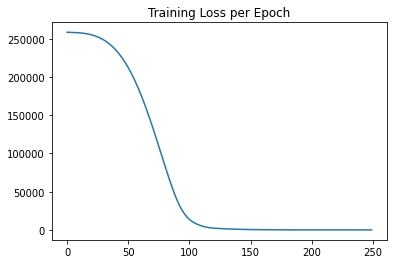

In [46]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [47]:
model.metrics_names

['loss', 'mean_squared_error']

In [48]:
training_score = model.evaluate(X_train,y_train)
test_score = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 37.1061 - mean_squared_error: 37.1061


In [51]:
training_score,test_score

([27.741222381591797, 27.741222381591797],
 [37.1060791015625, 37.1060791015625])

### Further Evaluations

In [53]:
y_pred  = model.predict(X_test)
y_pred

array([[449.84485],
       [350.78098],
       [504.2981 ],
       [641.16205],
       [509.3709 ],
       [426.92593],
       [482.65884],
       [410.1999 ],
       [542.7258 ],
       [529.0215 ],
       [322.13452],
       [460.0097 ],
       [412.1732 ],
       [580.3788 ],
       [360.29877],
       [403.2622 ],
       [658.0095 ],
       [619.5123 ],
       [454.94806],
       [463.44745],
       [326.17615],
       [467.3273 ],
       [474.98303],
       [641.56744],
       [734.52167],
       [450.2004 ],
       [616.0881 ],
       [466.64035],
       [627.7257 ],
       [512.3502 ],
       [699.5928 ],
       [464.85593],
       [491.48517],
       [490.5407 ],
       [400.64917],
       [433.021  ],
       [472.18555],
       [459.69186],
       [341.07568],
       [474.36362],
       [409.57834],
       [574.1776 ],
       [450.39084],
       [566.95654],
       [573.96436],
       [598.62494],
       [660.79895],
       [646.5839 ],
       [520.4873 ],
       [571.941  ],


In [54]:
pred_df = pd.DataFrame(np.column_stack((y_test,y_pred)),
                       columns=['Reali','Predetti'])
pred_df

,Reali,Predetti
0,446.612510,449.844849
1,349.717994,350.780975
2,508.911765,504.298096
3,635.347066,641.162048
4,505.692709,509.370911
...,...,...
295,553.879996,550.386536
296,610.455352,599.622070
297,565.936200,558.038391
298,493.012018,503.224731


Let's compare to the real test labels!

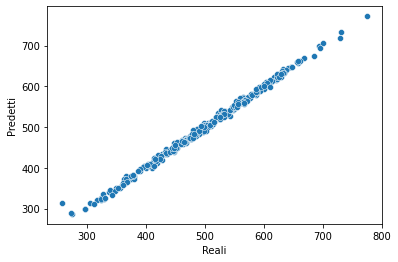

In [55]:
sns.scatterplot(x='Reali',y='Predetti',data=pred_df);

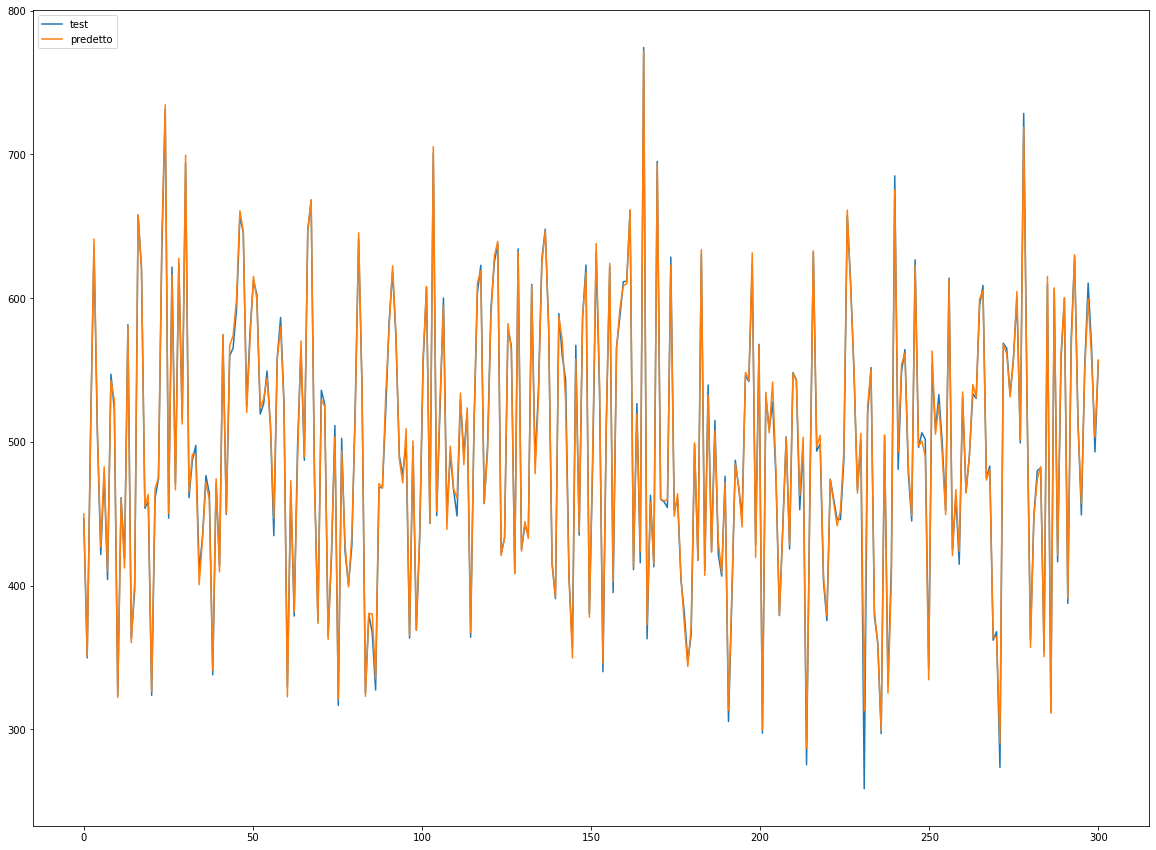

In [56]:
length = pred_df.shape[0] # 30 
x = np.linspace(0,length,length)


plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [57]:
pred_df['Error'] = pred_df['Reali'] - pred_df['Predetti']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


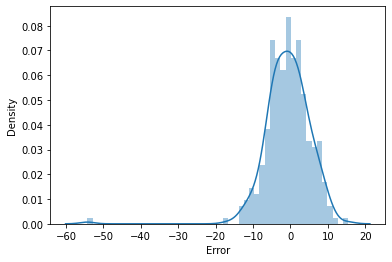

In [58]:
sns.distplot(pred_df['Error'],bins=50);

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.9958722164832329
mae:  4.370354955202936
mse:  37.10608891092092


# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [95]:
# [[Feature1, Feature2]]
new_data = [[998,1000]]

In [96]:
# Don't forget to scale!
ss.fit_transform(new_data)

array([[0., 0.]])

In [101]:
new_data_scaled = ss.fit_transform(new_data)
model.predict(new_data_scaled)

array([[500.49527]], dtype=float32)

## Saving and Loading a Model

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [104]:
load_model = load_model('my_model.h5')

In [105]:
load_model.predict(new_data_scaled)

array([[500.49527]], dtype=float32)

In [ ]:
#Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

import os, signal
os.kill(os.getpid(), signal.SIGKILL)

## If we standardize also the features? --> inverse transform to plot out the result

Text(0, 0.5, 'Output Variable (y)')

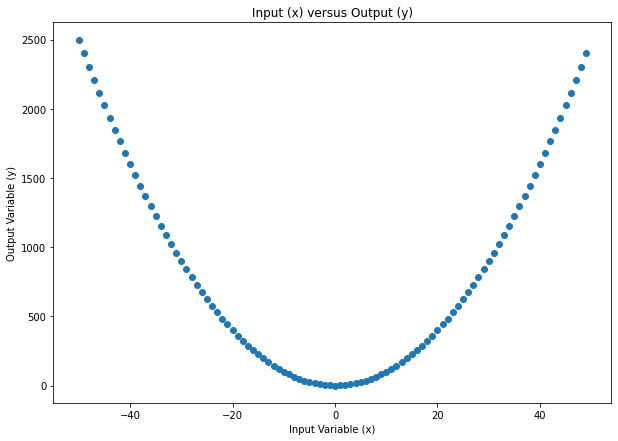

In [109]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([i for i in range(-50,50)])
y = np.array([i**2.0 for i in x])

plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')

In [110]:
print(x.min(), x.max(), y.min(), y.max())

-50 49 0.0 2500.0


In [111]:
# One column array
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [112]:
x.shape,y.shape

((100, 1), (100, 1))

In [113]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()

# X = mms.fit_transform(x)
# Y = mms.fit_transform(y)
# print(X.min(), X.max(), Y.min(), Y.max())

In [114]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(x)
Y = ss.fit_transform(y) 
print(X.min(), X.max(), Y.min(), Y.max())

-1.7148160424389376 1.7148160424389376 -1.117698947159351 2.2347274090474607


In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# input =1 feature--->  X.shape[1]

# design the neural network model
model = Sequential()

model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1)) # ---> linear activation fuinction

In [116]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')  #è una regressione!!

We don’t have a lot of data (e.g. about 100 rows), so we will fit the model for 500 epochs and use a small batch size of 10

In [117]:
# ft the model on the training dataset
model.fit(X, Y, 
          epochs=200, 
          batch_size=10
          )

Epoch 1/200
10/10 [==============================] - 0s 2ms/step - loss: 1.0314
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9834
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.9395
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8991
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8672
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8341
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 0.8053
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7841
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7639
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7440
Epoch 11/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7231
Epoch 12/200
10/10 [==============================] - 0s 2ms/step - loss: 0.7002
Epoch 13/200
10/10 [=================

In [118]:
# make predictions for the input data
y_pred = model.predict(X)
y_pred

array([[ 2.1489904 ],
       [ 2.0402    ],
       [ 1.9314098 ],
       [ 1.8226191 ],
       [ 1.7138288 ],
       [ 1.6050384 ],
       [ 1.4962481 ],
       [ 1.3874578 ],
       [ 1.2786676 ],
       [ 1.1698769 ],
       [ 1.0610867 ],
       [ 0.9522965 ],
       [ 0.8435056 ],
       [ 0.7347156 ],
       [ 0.62592506],
       [ 0.51713485],
       [ 0.41406745],
       [ 0.33472228],
       [ 0.2553777 ],
       [ 0.17603275],
       [ 0.09668793],
       [ 0.01734317],
       [-0.06200203],
       [-0.1413467 ],
       [-0.2206915 ],
       [-0.3000363 ],
       [-0.37938127],
       [-0.4466419 ],
       [-0.49117303],
       [-0.5357041 ],
       [-0.5802355 ],
       [-0.62476665],
       [-0.6692978 ],
       [-0.713829  ],
       [-0.7583602 ],
       [-0.8028913 ],
       [-0.84742236],
       [-0.89195377],
       [-0.9362428 ],
       [-0.9648742 ],
       [-0.9935053 ],
       [-1.0221367 ],
       [-1.0507681 ],
       [-1.0698819 ],
       [-1.0792005 ],
       [-1

In [119]:
y_pred_rescaled = ss.inverse_transform(y_pred)
y_pred_rescaled

array([[2436.0635   ],
       [2354.9353   ],
       [2273.8074   ],
       [2192.6792   ],
       [2111.551    ],
       [2030.423    ],
       [1949.2949   ],
       [1868.1669   ],
       [1787.0388   ],
       [1705.9106   ],
       [1624.7826   ],
       [1543.6547   ],
       [1462.5261   ],
       [1381.3984   ],
       [1300.2701   ],
       [1219.1422   ],
       [1142.282    ],
       [1083.1119   ],
       [1023.94244  ],
       [ 964.77264  ],
       [ 905.60297  ],
       [ 846.4333   ],
       [ 787.2633   ],
       [ 728.09375  ],
       [ 668.9241   ],
       [ 609.7544   ],
       [ 550.5846   ],
       [ 500.4264   ],
       [ 467.21826  ],
       [ 434.0102   ],
       [ 400.80185  ],
       [ 367.5937   ],
       [ 334.38553  ],
       [ 301.17737  ],
       [ 267.96918  ],
       [ 234.76105  ],
       [ 201.55298  ],
       [ 168.3446   ],
       [ 135.31702  ],
       [ 113.96576  ],
       [  92.614746 ],
       [  71.26349  ],
       [  49.91223  ],
       [  3

In [120]:
# report model error
from sklearn.metrics import mean_squared_error
print('MSE: %.3f' % mean_squared_error(y, y_pred))

MSE: 1249349.766


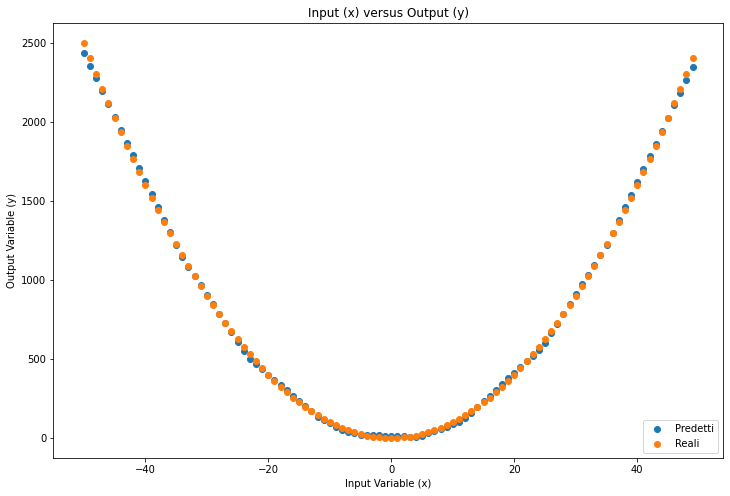

In [121]:
# plot x vs y_pred
plt.figure(figsize=(12,8))
plt.scatter(x,y_pred_rescaled, label='Predetti')
plt.scatter(x,y, label='Reali')
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend(loc=4)

In [ ]:
#Before running the next exercise, run the following cell to terminate the kernel and free memory resources:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)